In [2]:
# 1) Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [3]:
# 2) import the train data

df = pd.read_csv("Week7_train.csv")


In [4]:
# 3. Check the shape of the data 

print("Shape of the df : " , df.shape)

Shape of the df :  (42000, 785)


In [5]:
# 4. Select only 10 % of the data form experiment

df_sample = df.sample(frac=0.1,random_state=42)

In [6]:
# 5. Print shape of selected dataset

print("Shape of sample dataset : " , df_sample.shape)

Shape of sample dataset :  (4200, 785)


In [7]:
# 6. Look at the top 5 rows

df_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# 7. Find no of unique class labels (one way)

unique_labels = df_sample.iloc[:,0].nunique()

print("No of classes : ", unique_labels)


No of classes :  10


In [19]:
# 7. Find no of unique class labels (another way )

unique_labels = df_sample["label"].nunique()

print("No of classes : ", unique_labels)


No of classes :  10


In [9]:
# 8. Print the no of examples for each class label (one way)


df_sample.iloc[:,0].value_counts()   # same as group by count in dbms



label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [21]:
# 8. Print the no of examples for each class label (another way)


df_sample["label"].value_counts()   # same as group by count in dbms



label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [22]:
#  9. Prepare x and y

y = df_sample.iloc[:,0]
x = df_sample.iloc[:,1:]


#  another way

# x = df_sample.drop(columns="label")
# y = df_sample["label"]





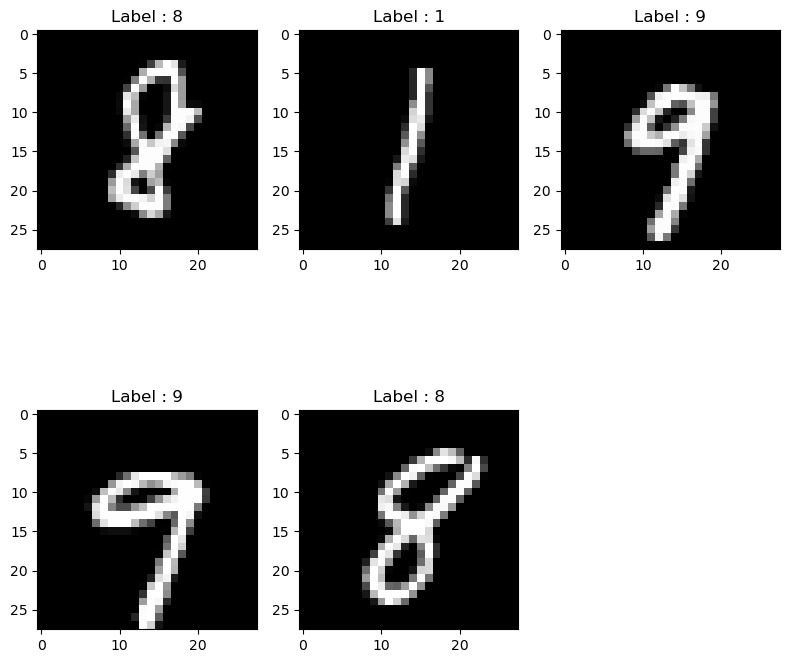

In [26]:
# Visualize the image of the first 4 in x and print the class label


# subplots creates grid of plots with given first two dimension parameters
# axes gives a 2d array of references two each subplot in grid to plot

fig, axes = plt.subplots(2,3,figsize=(8,8))
axes = axes.flatten()

#  here x.iloc gives series ds
#  values converts series to numpy 1d array
# reshape it to 2d array since image represetion is a 2d plane of pixels

for i in range(5):
    cur_ax = axes[i]
    img = x.iloc[i].values.reshape(28,28)
    cur_ax.imshow(img,cmap="grey")
    cur_ax.set_title(f"Label : {y.iloc[i]}")

#  delaxes deleted the specifed axes reference
plt.delaxes(axes[-1]) 
plt.tight_layout()
plt.show()

In [28]:
#  11. Split the train dataset into training set(75%) & validation set(25%)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [27]:
# 12. Fit KNN classifies to training dat
# 13. default parameters n_neighbors=5, metric="minkowski", p = 2

# Note :  using minkowski we can perform both metrics -> manhattan and euclidean
# to specify which metrics to model p - power parameter is given
#  p is given only when "minkowski" metric is used
#  p = 1   -> "manhattan
#  p = 2  -> "euclidean"

model = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
# 14. Predic the validation set results 

y_pred = model.predict(x_test)

y_pred[:5]

array([9, 3, 6, 7, 5])

In [30]:
# 15.  Print the confusion matrix 

print("Confusion matrix : \n" , confusion_matrix(y_test,y_pred))

Confusion matrix : 
 [[ 97   0   0   1   0   1   2   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   6  81   0   0   0   0   3   0   0]
 [  0   0   1 122   0   4   0   1   1   3]
 [  0   0   0   0  88   0   2   0   0   5]
 [  0   1   0   2   0  80   1   1   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   9   1   0   0   0   0 104   0   4]
 [  0   5   1   3   0   1   2   2  89   3]
 [  1   2   0   1   3   0   0   5   0  94]]


In [31]:
# 16. Print classitfication report and accuracy

print("Classification report : \n", classification_report(y_test,y_pred))
print(f"Accuracy score : {accuracy_score(y_test,y_pred):.2f}")


Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050

Accuracy score : 0.92


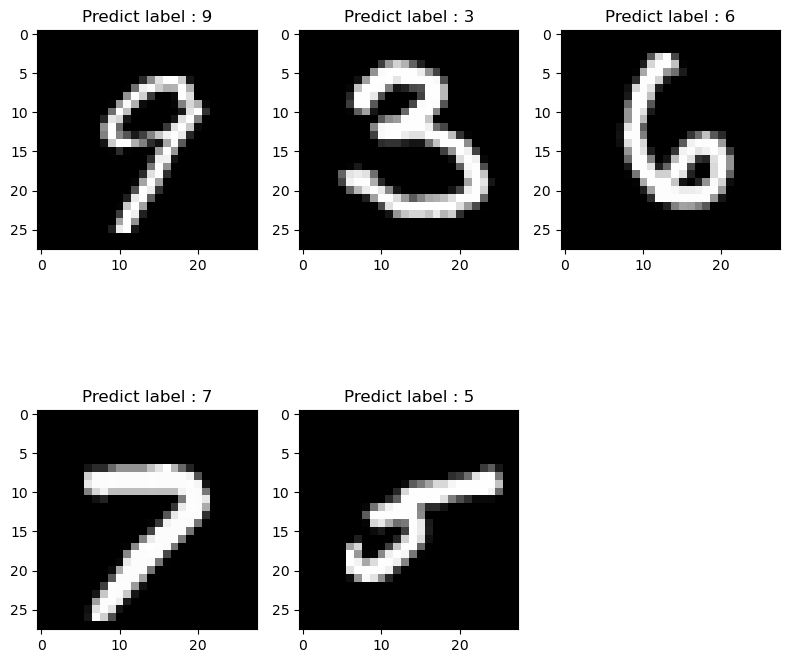

In [33]:
# 17. Visulaize the image of the first digits in x_test also print the predicted

plt.figure(figsize=(8,8))

for i in range(5):
    plt.subplot(2,3,i+1)
    img = x_test.iloc[i].values.reshape(28,28)
    plt.imshow(img,cmap="grey")
    plt.title(f"Predict label : {y_pred[i]}")

plt.tight_layout()
plt.show()
